In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
from sklearn.model_selection import GridSearchCV


In [4]:
df= pd.read_csv('FAF4.4_State.csv')

In [5]:
df.head()

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,...,tmiles_2015,tmiles_2020,tmiles_2025,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,curval_2013,curval_2014,curval_2015
0,NaN,1,1,NaN,NaN,1,NaN,1,1,3084.7678,...,204.8564,230.8865,254.3870,277.7117,305.7184,336.1778,351.9228,4273.0414,5156.8149,4713.9220
1,NaN,1,12,NaN,NaN,1,NaN,1,1,10.5060,...,4.4557,4.2213,4.0848,3.9862,3.8644,4.0277,4.3933,21.0003,23.9063,21.2444
2,NaN,1,13,NaN,NaN,1,NaN,1,1,97.4125,...,27.3168,26.4331,26.7289,27.8136,28.6019,28.5799,31.2815,147.2225,149.8771,131.5474
3,NaN,1,20,NaN,NaN,1,NaN,1,1,40.1150,...,29.6268,29.7992,28.4390,26.7350,24.9841,23.8533,25.2513,115.0118,101.3772,88.1043
4,NaN,1,22,NaN,NaN,1,NaN,1,1,23.3480,...,4.5342,4.5391,4.5167,4.5650,4.6830,4.7934,5.1410,34.9698,44.8126,40.8650


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550321 entries, 0 to 550320
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fr_orig      218085 non-null  float64
 1   dms_orig     550321 non-null  int64  
 2   dms_dest     550321 non-null  int64  
 3   fr_dest      219434 non-null  float64
 4   fr_inmode    218085 non-null  float64
 5   dms_mode     550321 non-null  int64  
 6   fr_outmode   219434 non-null  float64
 7   sctg2        550321 non-null  int64  
 8   trade_type   550321 non-null  int64  
 9   tons_2012    550321 non-null  float64
 10  tons_2013    550321 non-null  float64
 11  tons_2014    550321 non-null  float64
 12  tons_2015    550321 non-null  float64
 13  tons_2020    550321 non-null  float64
 14  tons_2025    550321 non-null  float64
 15  tons_2030    550321 non-null  float64
 16  tons_2035    550321 non-null  float64
 17  tons_2040    550321 non-null  float64
 18  tons_2045    550321 non-

In [7]:
df.describe()

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,...,tmiles_2015,tmiles_2020,tmiles_2025,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,curval_2013,curval_2014,curval_2015
count,218085.000000,550321.000000,550321.000000,219434.000000,218085.000000,550321.000000,219434.000000,550321.000000,550321.000000,550321.000000,...,550321.000000,550321.000000,550321.000000,550321.000000,550321.000000,550321.000000,550321.000000,550321.000000,550321.000000,550321.000000
mean,804.760667,29.195161,28.874819,804.469667,3.386033,3.054230,3.353090,27.492398,2.193763,30.968979,...,9.378665,10.484708,11.563743,12.268061,13.067224,14.040868,15.042116,34.537259,35.974340,34.228126
std,2.259845,15.492313,15.543865,2.280516,0.973778,1.643782,0.967229,10.982260,0.752443,856.913972,...,260.328350,270.553018,297.615239,304.507345,316.439840,328.096216,339.297884,586.436844,598.307118,525.995794
min,801.000000,1.000000,1.000000,801.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,803.000000,16.000000,13.000000,803.000000,3.000000,1.000000,3.000000,22.000000,2.000000,0.000500,...,0.000100,0.000100,0.000200,0.000200,0.000200,0.000300,0.000300,0.011200,0.010900,0.010800
50%,804.000000,29.000000,29.000000,804.000000,3.000000,4.000000,3.000000,30.000000,2.000000,0.015400,...,0.007900,0.009700,0.012000,0.014400,0.017400,0.021900,0.025600,0.186700,0.193000,0.191800
75%,807.000000,42.000000,42.000000,806.000000,4.000000,4.000000,4.000000,36.000000,3.000000,0.292200,...,0.262400,0.307100,0.355600,0.405500,0.465400,0.548300,0.621600,2.633200,2.759100,2.750000
max,808.000000,56.000000,56.000000,808.000000,7.000000,8.000000,7.000000,99.000000,3.000000,151931.929200,...,82288.258800,72124.059600,77455.841600,80116.013400,84138.840000,87847.445900,87396.826700,140008.346300,131037.168900,123237.780400


In [8]:
df.isna().sum()

fr_orig        332236
dms_orig            0
dms_dest            0
fr_dest        330887
fr_inmode      332236
dms_mode            0
fr_outmode     330887
sctg2               0
trade_type          0
tons_2012           0
tons_2013           0
tons_2014           0
tons_2015           0
tons_2020           0
tons_2025           0
tons_2030           0
tons_2035           0
tons_2040           0
tons_2045           0
value_2012          0
value_2013          0
value_2014          0
value_2015          0
value_2020          0
value_2025          0
value_2030          0
value_2035          0
value_2040          0
value_2045          0
tmiles_2012         0
tmiles_2013         0
tmiles_2014         0
tmiles_2015         0
tmiles_2020         0
tmiles_2025         0
tmiles_2030         0
tmiles_2035         0
tmiles_2040         0
tmiles_2045         0
curval_2013         0
curval_2014         0
curval_2015         0
dtype: int64

In [9]:
df= df.drop(['fr_orig','fr_dest','fr_inmode','fr_outmode'], axis=1)
df.head()

,dms_orig,dms_dest,dms_mode,sctg2,trade_type,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,...,tmiles_2015,tmiles_2020,tmiles_2025,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,curval_2013,curval_2014,curval_2015
0,1,1,1,1,1,3084.7678,3117.7158,3227.1130,3312.6727,3689.9802,...,204.8564,230.8865,254.3870,277.7117,305.7184,336.1778,351.9228,4273.0414,5156.8149,4713.9220
1,1,12,1,1,1,10.5060,8.4488,8.1097,8.0446,7.5912,...,4.4557,4.2213,4.0848,3.9862,3.8644,4.0277,4.3933,21.0003,23.9063,21.2444
2,1,13,1,1,1,97.4125,102.6977,89.7614,88.5371,85.9058,...,27.3168,26.4331,26.7289,27.8136,28.6019,28.5799,31.2815,147.2225,149.8771,131.5474
3,1,20,1,1,1,40.1150,44.1161,33.3603,32.5620,32.7515,...,29.6268,29.7992,28.4390,26.7350,24.9841,23.8533,25.2513,115.0118,101.3772,88.1043
4,1,22,1,1,1,23.3480,24.9249,27.3524,28.0044,28.5412,...,4.5342,4.5391,4.5167,4.5650,4.6830,4.7934,5.1410,34.9698,44.8126,40.8650


# Analyzing the target column

Text(0.5, 1.0, 'Shipment value in year 2015')

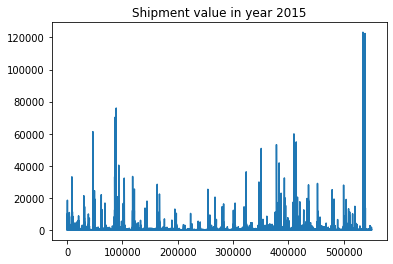

In [10]:
df['curval_2015'].plot()
plt.title("Shipment value in year 2015")

## Analayzing the target with respect to types of trade 

Text(0.5, 1.0, 'Trade types with respect to cost')

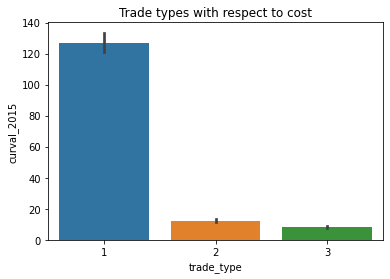

In [11]:
sns.barplot(x="trade_type", y="curval_2015", data=df)
plt.title("Trade types with respect to cost")

In [12]:
df.columns

Index(['dms_orig', 'dms_dest', 'dms_mode', 'sctg2', 'trade_type', 'tons_2012',
       'tons_2013', 'tons_2014', 'tons_2015', 'tons_2020', 'tons_2025',
       'tons_2030', 'tons_2035', 'tons_2040', 'tons_2045', 'value_2012',
       'value_2013', 'value_2014', 'value_2015', 'value_2020', 'value_2025',
       'value_2030', 'value_2035', 'value_2040', 'value_2045', 'tmiles_2012',
       'tmiles_2013', 'tmiles_2014', 'tmiles_2015', 'tmiles_2020',
       'tmiles_2025', 'tmiles_2030', 'tmiles_2035', 'tmiles_2040',
       'tmiles_2045', 'curval_2013', 'curval_2014', 'curval_2015'],
      dtype='object')

# Bivariate analysis of trade types with respect to tons

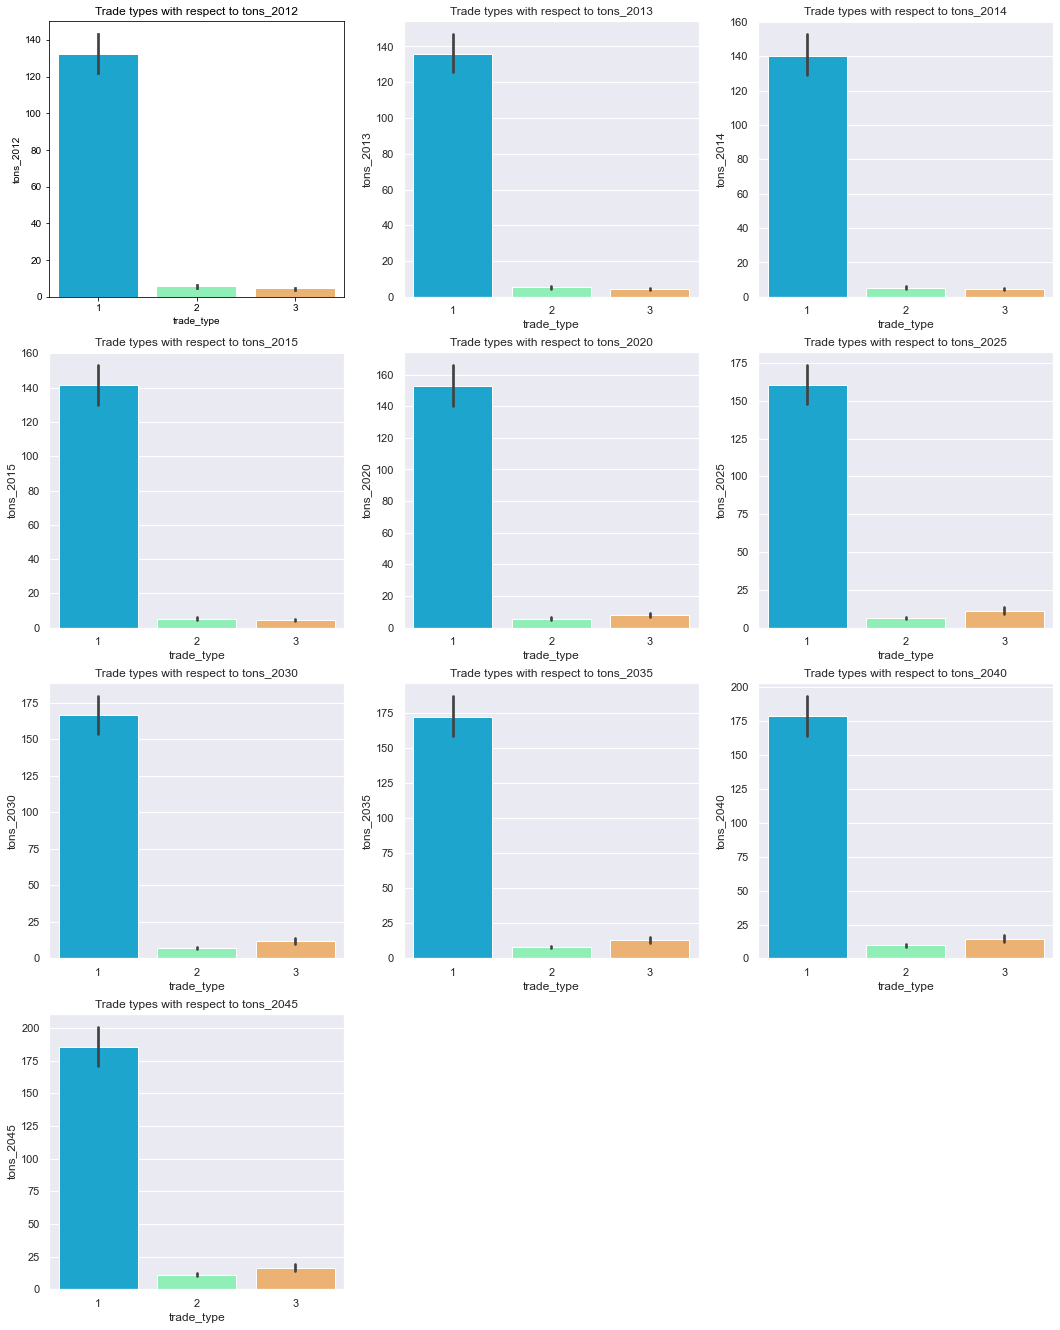

In [ ]:
plt.figure(figsize=(18,16))
cols=['tons_2012','tons_2013','tons_2014','tons_2015','tons_2020','tons_2025',
          'tons_2030', 'tons_2035', 'tons_2040', 'tons_2045']


for i,j in zip(range(1, 18),cols):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.barplot(x='trade_type',y=j,data=df,palette='rainbow')
    sns.set_theme()
    plt.title('Trade types with respect to {}'.format(j))

# Bivariate analysis  of trade types with respect to values

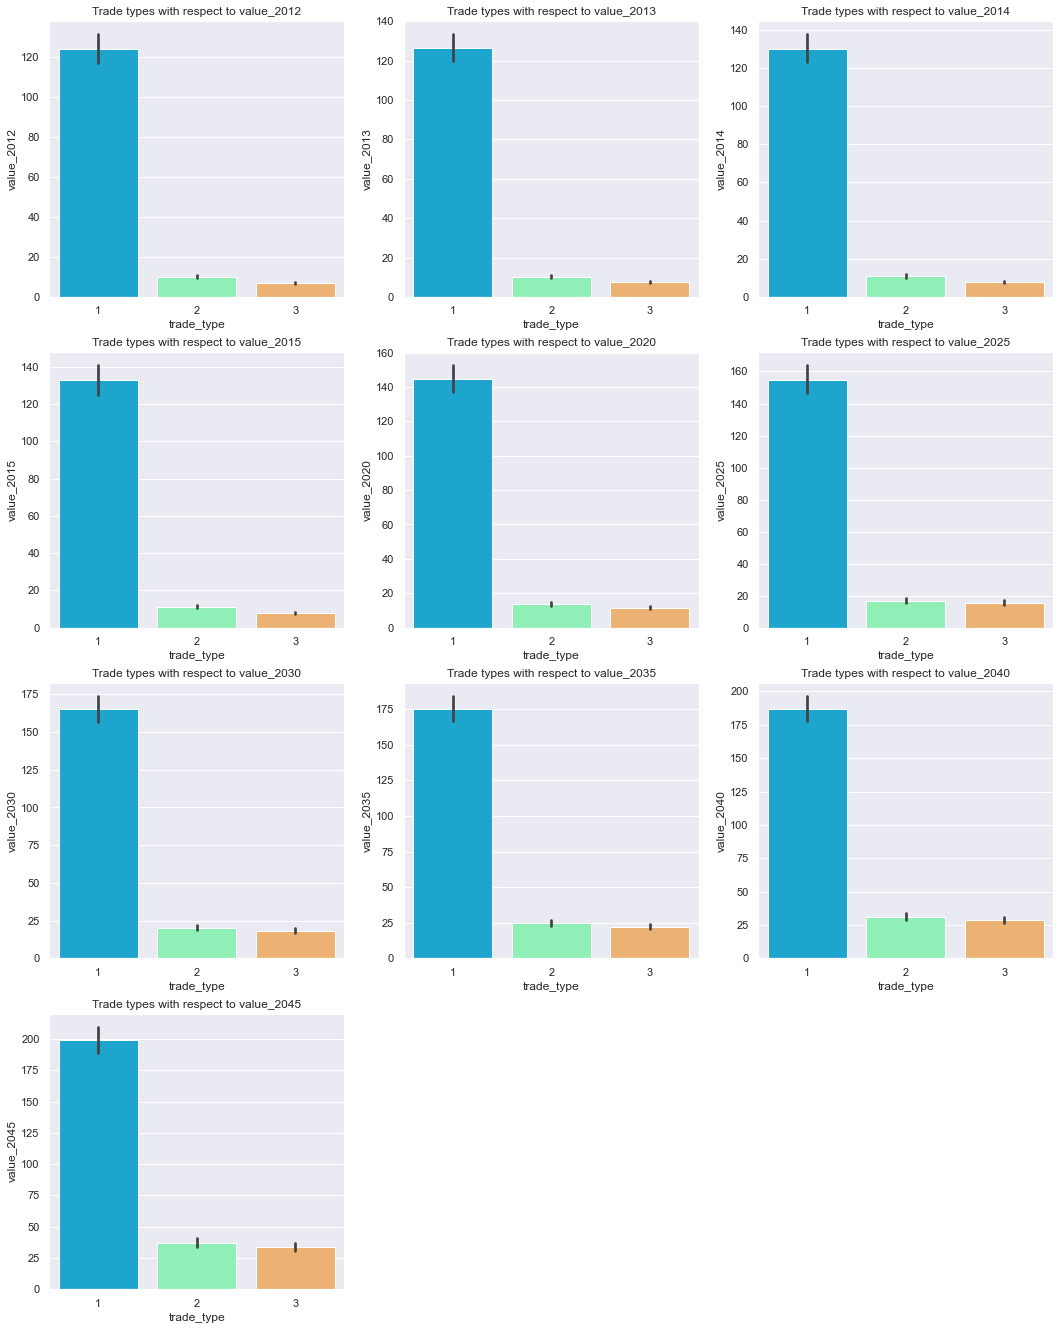

In [ ]:
plt.figure(figsize=(18,16))
cols=['value_2012',
       'value_2013', 'value_2014', 'value_2015', 'value_2020', 'value_2025',
       'value_2030', 'value_2035', 'value_2040', 'value_2045']


for i,j in zip(range(1, 18),cols):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.barplot(x='trade_type',y=j,data=df,palette='rainbow')
    sns.set_theme()
    plt.title('Trade types with respect to {}'.format(j))

# Boxplot of trade type with respect to value

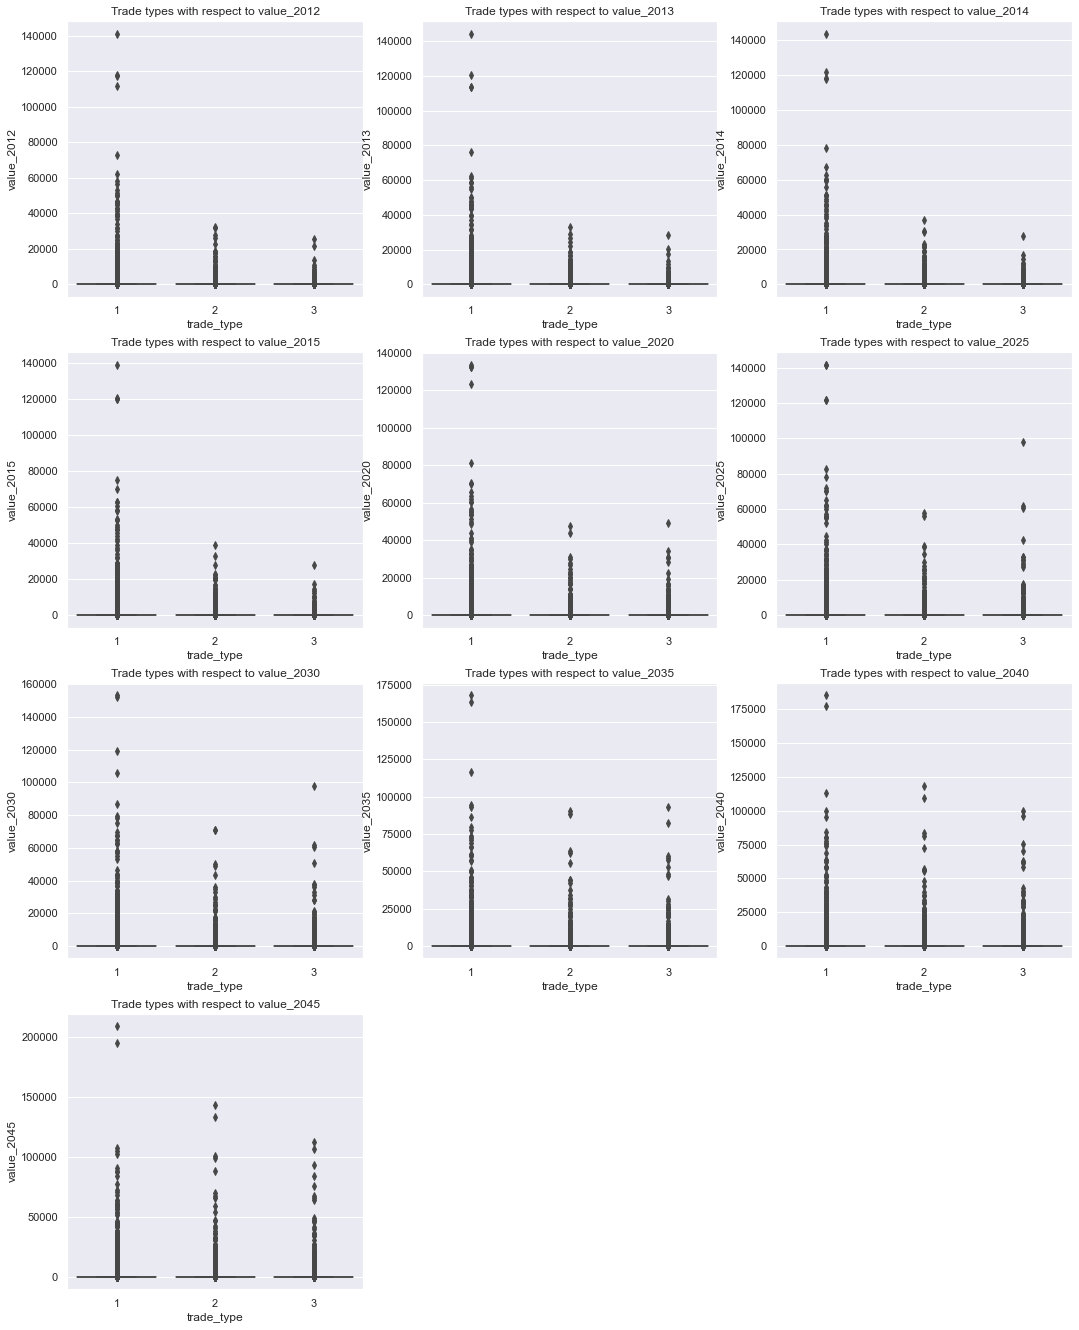

In [ ]:
plt.figure(figsize=(18,16))
cols=['value_2012',
       'value_2013', 'value_2014', 'value_2015', 'value_2020', 'value_2025',
       'value_2030', 'value_2035', 'value_2040', 'value_2045']


for i,j in zip(range(1, 18),cols):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.boxplot(x='trade_type',y=j,data=df,palette='rainbow')
    sns.set_theme()
    plt.title('Trade types with respect to {}'.format(j))

# Scatter plot of target with respect to tons, value, tmiles and destination

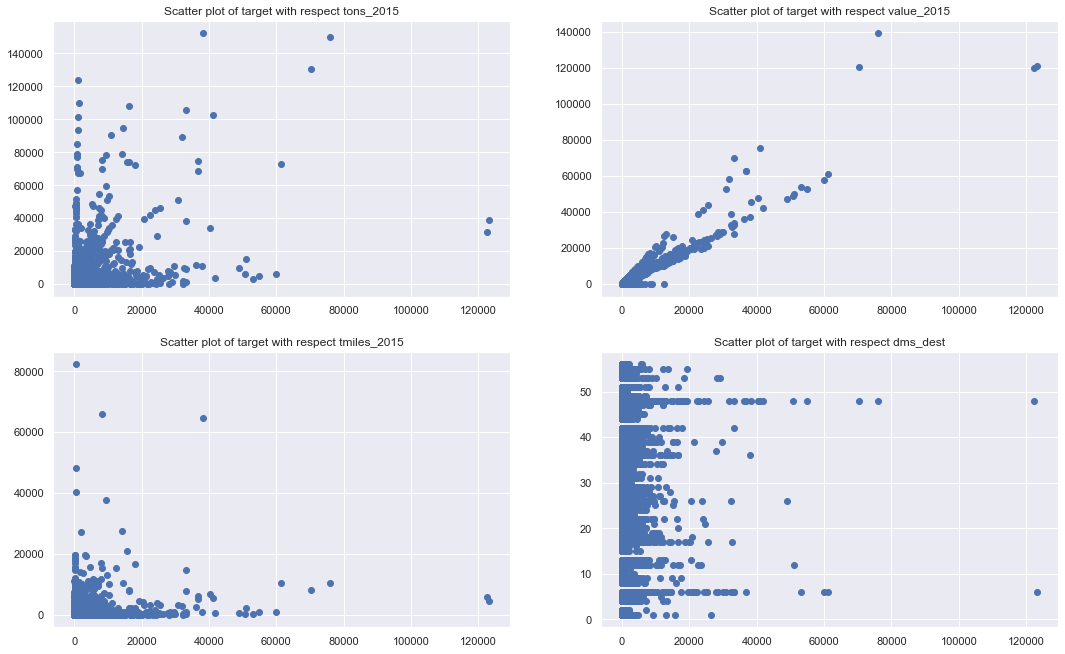

In [ ]:
plt.figure(figsize=(18,16))
columnss=['tons_2015','value_2015','tmiles_2015','dms_dest']


for i,j in zip(range(1, 18),columnss):
    plt.subplot(6, 2, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    plt.scatter(df['curval_2015'], df[j])
    plt.title('Scatter plot of target with respect {}'.format(j))

# Finding the important attributes with respect to target variables

In [13]:
y=df['curval_2015']
X=df.drop(labels='curval_2015', axis=1)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor as ETR

In [ ]:
best= ETR()
best.fit(X,y)

In [ ]:
best.feature_importances_

array([0.00031897, 0.00025869, 0.00149945, 0.00613134, 0.00072574,
       0.00244179, 0.0021553 , 0.00201414, 0.00199692, 0.00165175,
       0.00089455, 0.00138799, 0.00127766, 0.0009094 , 0.00070275,
       0.09505931, 0.08966669, 0.1295074 , 0.12600072, 0.10478625,
       0.06471877, 0.04884858, 0.03473216, 0.02430052, 0.00896266,
       0.00050771, 0.00038104, 0.00035144, 0.00056565, 0.00070131,
       0.00022208, 0.00019486, 0.0001929 , 0.00022485, 0.00019821,
       0.08782463, 0.15768585])

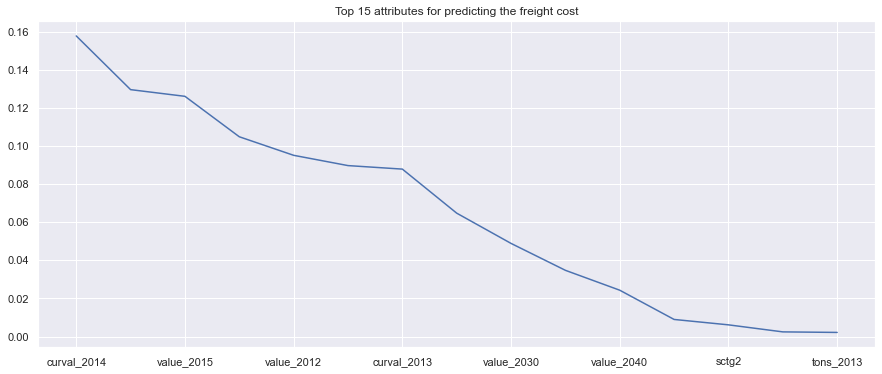

In [ ]:
attributes=pd.Series(best.feature_importances_,index=X.columns)
plt.figure(figsize=(15,6))

attributes.nlargest(15).plot()
plt.title("Top 15 attributes for predicting the freight cost")
plt.show()

# Outlier checking and removal

In [15]:
df.shape

(550321, 38)

In [16]:
from scipy import stats

m = np.abs(stats.zscore(df))
new_df = df[(m < 5).all(axis=1)]

In [17]:
new_df.shape

(548299, 38)

# Defining predictors and the respose variable

In [18]:
response=new_df['curval_2015']
predictor=new_df.drop(labels='curval_2015', axis=1)

# Splitting the data into training and testing

In [19]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(predictor, response, test_size = 0.25)

# Scaling the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

# Decsion tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DT

dtr= DT()
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:

result=dtr.predict(X_test)

print('MAE of decision tree is :',mae(y_test, result))
print('MSE of decision tree is:', mse(y_test, result))
print('RMSE of decision tree is :', np.sqrt(mse(y_test, result)))

MAE of decision tree is : 0.8064944330518219
MSE of decision tree is: 119.78095664600563
RMSE of decision tree is : 10.94444866797801


## hyperparamter tunning

In [ ]:

par = {
    'max_depth': [5,6,7,10,20,30],
    'splitter': ['best', 'random']
}

new_dtr = GridSearchCV(dtr, par, cv=3, n_jobs=-1)
new_dtr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 10, 20, 30],
                         'splitter': ['best', 'random']})

In [ ]:
new_dtr.best_params_

{'max_depth': 10, 'splitter': 'best'}

In [ ]:
tuned_dtr= DT(**new_dtr.best_params_)
tuned_dtr.fit(X_train, y_train)


result=tuned_dtr.predict(X_test)

print('MAE of tuned decision tree is :',mae(y_test, result))
print('MSE of  tuned decision tree is:', mse(y_test, result))
print('RMSE of tuned  decision tree is :', np.sqrt(mse(y_test, result)))

MAE of tuned decision tree is : 1.0508636876317992
MSE of  tuned decision tree is: 117.29010990103146
RMSE of tuned  decision tree is : 10.83005585862933


# Extras tree regressor

In [ ]:
etr= ETR()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

In [ ]:
result=etr.predict(X_test)

print('MAE of extra tree is :',mae(y_test, result))
print('MSE of extra tree is:', mse(y_test, result))
print('RMSE of extra tree is :', np.sqrt(mse(y_test, result)))

MAE of extra tree is : 0.6219567445902062
MSE of extra tree is: 49.02650706824859
RMSE of extra tree is : 7.00189310602844


# KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
clf= KNR(n_neighbors=2)
clf.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=2)

In [ ]:
result=clf.predict(X_test)

print('MAE of KNN is :',mae(y_test, result))
print('MSE of KNN is:', mse(y_test, result))
print('RMSE of KNN is :', np.sqrt(mse(y_test, result)))

MAE of KNN is : 4.341690803808594
MSE of KNN is: 335.6430529895281
RMSE of KNN is : 18.32056366462364


# Neural network

In [ ]:
X_train.shape

(411224, 37)

In [21]:
from tensorflow.keras.models import Sequential as seq
from tensorflow.keras.layers import Dense as d
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
net = seq()
net.add(d(37,activation='relu'))
net.add(d(37,activation='relu'))
net.add(d(37,activation='relu'))
net.add(d(37,activation='relu'))
net.add(d(1))
net.compile(optimizer='Adam',loss='mse')

In [ ]:
history=net.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=50)
net.summary()

Epoch 1/50
3213/3213 [==============================] - 9s 2ms/step - loss: 903.1251 - val_loss: 216.6346
Epoch 2/50
3213/3213 [==============================] - 8s 2ms/step - loss: 132.0925 - val_loss: 153.2273
Epoch 3/50
3213/3213 [==============================] - 7s 2ms/step - loss: 103.2817 - val_loss: 93.4187
Epoch 4/50
3213/3213 [==============================] - 7s 2ms/step - loss: 96.2800 - val_loss: 77.7703
Epoch 5/50
3213/3213 [==============================] - 9s 3ms/step - loss: 90.1833 - val_loss: 69.7696
Epoch 6/50
3213/3213 [==============================] - 7s 2ms/step - loss: 83.3007 - val_loss: 75.0774
Epoch 7/50
3213/3213 [==============================] - 7s 2ms/step - loss: 77.6717 - val_loss: 66.7005
Epoch 8/50
3213/3213 [==============================] - 6s 2ms/step - loss: 77.2787 - val_loss: 71.6877
Epoch 9/50
3213/3213 [==============================] - 7s 2ms/step - loss: 75.2091 - val_loss: 54.3364
Epoch 10/50
3213/3213 [==============================] - 9s

In [ ]:
loss = pd.DataFrame(net.history.history)

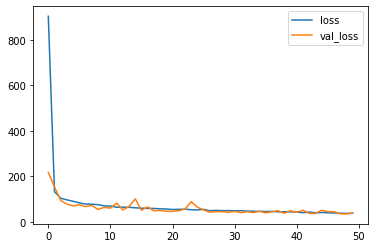

In [ ]:
loss.plot()

In [ ]:
y_pred = net.predict(X_test)

print('MAE of neural network is :',mae(y_test, y_pred))
print('MSE of  neural network is:', mse(y_test, y_pred))
print('RMSE of neural network is :', np.sqrt(mse(y_test, y_pred)))


MAE of neural network is : 1.5956008864749904
MSE of  neural network is: 38.14561292188974
RMSE of neural network is : 6.176213477681106


# CNN regressor

In [22]:
from keras.layers import Flatten as fla, Dropout, BatchNormalization as BN
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau as ROP
import tensorflow as tf

In [23]:
cnet = seq()

cnet.add(d(324, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

cnet.add(d(512, activation='relu'))
cnet.add(d(512, activation='relu'))
cnet.add(d(256, activation='relu'))

cnet.add(fla())
cnet.add(d(1024, activation='relu'))
cnet.add(Dropout(0.25))

cnet.add(d(1, kernel_initializer='normal',activation='linear', kernel_regularizer = tf.keras.regularizers.l1(l=0.01) ))

cnet.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
cnet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 324)               12312     
                                                                 
 dense_1 (Dense)             (None, 512)               166400    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1024)              263168    
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [24]:
history= cnet.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
3213/3213 [==============================] - 13s 3ms/step - loss: 3.1571 - mean_absolute_error: 3.0469
Epoch 2/50
3213/3213 [==============================] - 10s 3ms/step - loss: 2.0157 - mean_absolute_error: 1.9379
Epoch 3/50
3213/3213 [==============================] - 10s 3ms/step - loss: 1.9225 - mean_absolute_error: 1.8546
Epoch 4/50
3213/3213 [==============================] - 11s 3ms/step - loss: 1.7982 - mean_absolute_error: 1.7317
Epoch 5/50
3213/3213 [==============================] - 16s 5ms/step - loss: 1.7298 - mean_absolute_error: 1.6637
Epoch 6/50
3213/3213 [==============================] - 15s 5ms/step - loss: 1.6585 - mean_absolute_error: 1.5925
Epoch 7/50
3213/3213 [==============================] - 10s 3ms/step - loss: 1.6311 - mean_absolute_error: 1.5634
Epoch 8/50
3213/3213 [==============================] - 10s 3ms/step - loss: 1.5876 - mean_absolute_error: 1.5189
Epoch 9/50
3213/3213 [==============================] - 10s 3ms/step - loss: 1.5778 - me

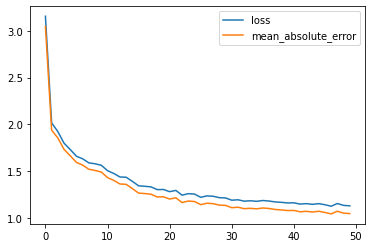

In [25]:
loss = pd.DataFrame(cnet.history.history)
loss.plot()

In [26]:
y_pred = cnet.predict(X_test)


print('MAE of Convolutional neural network is :',mae(y_test, y_pred))
print('MSE of  Convolutional neural network is:', mse(y_test, y_pred))
print('RMSE of Convolutional neural network is :', np.sqrt(mse(y_test, y_pred)))


MAE of Convolutional neural network is : 0.798214098862789
MSE of  Convolutional neural network is: 31.302928072907513
RMSE of Convolutional neural network is : 5.594901971697762
